# Análisis de Calidad del Aire - Región Arequipa

Este notebook presenta un análisis detallado de los datos de vigilancia y seguimiento ambiental en la calidad del aire para la región de Arequipa.

## Objetivos del Análisis:
- Cargar y explorar los datos de calidad del aire
- Filtrar datos específicos para la región de Arequipa
- Analizar las tendencias temporales de contaminantes
- Identificar patrones y anomalías
- Generar visualizaciones informativas
- Proporcionar conclusiones y recomendaciones

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

# Importaciones opcionales
try:
    import seaborn as sns
    sns.set_palette("husl")
    plt.style.use('seaborn-v0_8')
    print("✅ Seaborn importado correctamente")
except ImportError:
    print("⚠️ Seaborn no disponible, usando matplotlib base")
    sns = None

try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    print("✅ Plotly importado correctamente")
except ImportError:
    print("⚠️ Plotly no disponible, usando matplotlib")
    px = None
    go = None

# Configuración
warnings.filterwarnings('ignore')

# Configuración de pandas para mostrar más filas y columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Librerías básicas importadas correctamente")
print(f"📊 Versión de Pandas: {pd.__version__}")
print(f"🔢 Versión de NumPy: {np.__version__}")
print(f"📈 Versión de Matplotlib: {plt.matplotlib.__version__}")

⚠️ Seaborn no disponible, usando matplotlib base
⚠️ Plotly no disponible, usando matplotlib
✅ Librerías básicas importadas correctamente
📊 Versión de Pandas: 2.3.0
🔢 Versión de NumPy: 2.2.4
📈 Versión de Matplotlib: 3.10.1


In [4]:
# Cargar los datos
print("📂 Cargando datos de calidad del aire...")

# Lista de configuraciones a probar
configs = [
    {'encoding': 'utf-8', 'sep': ',', 'on_bad_lines': 'skip'},
    {'encoding': 'latin-1', 'sep': ',', 'on_bad_lines': 'skip'},
    {'encoding': 'iso-8859-1', 'sep': ',', 'on_bad_lines': 'skip'},
    {'encoding': 'cp1252', 'sep': ',', 'on_bad_lines': 'skip'},
    {'encoding': 'utf-8', 'sep': ';', 'on_bad_lines': 'skip'},
    {'encoding': 'latin-1', 'sep': ';', 'on_bad_lines': 'skip'},
]

df = None
for i, config in enumerate(configs):
    try:
        print(f"🔄 Intento {i+1}: encoding={config['encoding']}, separador='{config['sep']}'")
        df = pd.read_csv('1a_Vigilancia y Seguimiento ambiental en la calidad del aire.csv', 
                        low_memory=False,
                        **config)
        print(f"✅ Datos cargados exitosamente: {df.shape[0]} filas y {df.shape[1]} columnas")
        print(f"📊 Configuración exitosa: {config}")
        break
    except Exception as e:
        print(f"❌ Error con configuración {i+1}: {str(e)[:100]}...")
        continue

if df is None:
    print("❌ No se pudo cargar el archivo con ninguna configuración")
else:
    # Mostrar información básica del dataset
    print("\n📊 Información básica del dataset:")
    print(f"   Tamaño: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"   Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Mostrar tipos de datos
    print("\n🔍 Tipos de datos por columna:")
    for col, dtype in df.dtypes.items():
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        print(f"   {col}: {dtype} (nulos: {null_count:,} - {null_pct:.1f}%)")

📂 Cargando datos de calidad del aire...
🔄 Intento 1: encoding=utf-8, separador=','
✅ Datos cargados exitosamente: 2409992 filas y 1 columnas
📊 Configuración exitosa: {'encoding': 'utf-8', 'sep': ',', 'on_bad_lines': 'skip'}

📊 Información básica del dataset:
   Tamaño: 2,409,992 filas × 1 columnas
   Memoria: 453.79 MB

🔍 Tipos de datos por columna:
   NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE": object (nulos: 1,973,687 - 81.9%)


In [5]:
# Exploración inicial de los datos
print("🔍 Exploración inicial de los datos")
print("=" * 50)

# Mostrar las primeras filas
print("\n📋 Primeras 5 filas del dataset:")
display(df.head())

print("\n📋 Últimas 5 filas del dataset:")
display(df.tail())

# Mostrar nombres de columnas
print(f"\n🏷️ Columnas del dataset ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Verificar valores únicos en columnas clave (buscando referencias a Arequipa)
print("\n🗺️ Buscando columnas relacionadas con ubicación geográfica...")
location_columns = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['region', 'departamento', 'provincia', 'distrito', 'ubicacion', 'lugar', 'zona']):
        location_columns.append(col)
        print(f"   ➤ {col}")

if location_columns:
    print(f"\n📍 Valores únicos en columnas de ubicación:")
    for col in location_columns:
        unique_values = df[col].unique()
        print(f"\n{col}:")
        print(f"   Total valores únicos: {len(unique_values)}")
        print(f"   Primeros 10: {list(unique_values[:10])}")
else:
    print("   No se encontraron columnas obvias de ubicación, revisaremos todas las columnas.")

🔍 Exploración inicial de los datos

📋 Primeras 5 filas del dataset:


NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE"
Calidad del aire en el ámbito de influencia de ... a 12 3 km al noroeste de la planta industrial de la ... 5 km al sureste de la municipalidad distrital L...   provincia Paita.";"Simple";"Concentración de ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                                                                           5 km al sureste de la municipalidad distrital L...   provincia Paita.";"Simple";"Concentración de ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                                                                           5 km al sureste de la municipalidad distrital L...   provincia Paita.";"Simple";"Concentración de ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                                                                           5 km al sureste de la municipalidad distrital L...   provincia Paita.";"Simple";"Concentración de ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                                                                           5 km al sureste de la municipalidad distrital L...   provincia Paita.";"Simple";"Concentración de ...


📋 Últimas 5 filas del dataset:


NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE"
Calidad de aire realizada en el ámbito de la zo... Mz. Y Lote 28                                        aproximadamente a 80 m del asentamiento human...  distrito Mi Perú.";"Simple";"Concentración de ...                                                NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Calidad de aire realizada en el ámbito de la zo... distrito Ventanilla.";"Simple";"Concentración d... NaN                                                NaN                                                                                               NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                   distrito Ventanilla.";"Simple";"Concentración d... NaN                                                NaN                                                                                               NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                   distrito Ventanilla.";"Simple";"Concentración d... NaN                                                NaN                                                                                               NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
                                                   distrito Ventanilla.";"Simple";"Concentración d... NaN                                                NaN                                                                                               NaN


🏷️ Columnas del dataset (1 total):
 1. NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE"

🗺️ Buscando columnas relacionadas con ubicación geográfica...
   ➤ NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOX

In [6]:
# Filtrar datos para la región de Arequipa
print("🎯 Filtrando datos para la región de Arequipa")
print("=" * 50)

# Buscar columnas que puedan contener información de ubicación
location_terms = ['arequipa', 'region', 'departamento', 'provincia', 'distrito', 'ubicacion']
arequipa_data = None

# Buscar en todas las columnas de texto
for col in df.columns:
    if df[col].dtype == 'object':  # Solo columnas de texto
        # Buscar valores que contengan "Arequipa" (case insensitive)
        mask = df[col].astype(str).str.contains('arequipa', case=False, na=False)
        if mask.any():
            count = mask.sum()
            print(f"📍 Encontrados {count:,} registros con 'Arequipa' en columna '{col}'")
            
            # Mostrar algunos valores únicos que contienen Arequipa
            arequipa_values = df[mask][col].unique()[:10]
            print(f"   Ejemplos: {list(arequipa_values)}")
            
            # Si es la primera vez que encontramos datos de Arequipa, usar esta columna
            if arequipa_data is None:
                arequipa_data = df[mask].copy()
                main_location_col = col
                print(f"   ✅ Usando columna '{col}' como filtro principal")

if arequipa_data is not None:
    print(f"\n📊 Datos filtrados para Arequipa:")
    print(f"   Total registros: {len(arequipa_data):,}")
    print(f"   Porcentaje del total: {(len(arequipa_data)/len(df)*100):.2f}%")
    
    # Mostrar información sobre la columna principal de ubicación
    print(f"\n🗺️ Valores únicos en '{main_location_col}' (Arequipa):")
    arequipa_locations = arequipa_data[main_location_col].value_counts()
    print(arequipa_locations.head(10))
    
else:
    print("❌ No se encontraron datos específicos para Arequipa")
    print("🔍 Revisemos todas las columnas para entender mejor los datos...")
    
    # Mostrar una muestra de valores únicos de cada columna de texto
    for col in df.columns[:10]:  # Solo las primeras 10 columnas
        if df[col].dtype == 'object':
            unique_vals = df[col].dropna().unique()[:5]
            print(f"\n{col}: {list(unique_vals)}")

🎯 Filtrando datos para la región de Arequipa
❌ No se encontraron datos específicos para Arequipa
🔍 Revisemos todas las columnas para entender mejor los datos...

NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE": [' provincia Paita.";"Simple";"Concentración de partículas en PM10";"1 hora";2021-12-08;1899-12-31 18:00:00;NA;NA;"ug/m3";"-";"-";"-";"41.7";"-";"-";"-";"-";"-";"-";"-";"-";"-";20240429', ' provincia Paita.";"Simple";"Concentración de partículas en PM10";"1 hora";2021-12-08;1899-12-31 19:00:00;NA;NA;"ug/m3";"-";"-";"-

In [7]:
# Análisis temporal de los datos de Arequipa
if arequipa_data is not None:
    print("📅 Análisis temporal de los datos de Arequipa")
    print("=" * 50)
    
    # Buscar columnas de fecha
    date_columns = []
    for col in arequipa_data.columns:
        if any(term in col.lower() for term in ['fecha', 'date', 'tiempo', 'time', 'año', 'mes', 'dia']):
            date_columns.append(col)
    
    print(f"🗓️ Columnas de fecha encontradas: {date_columns}")
    
    # Intentar convertir las columnas de fecha
    for col in date_columns:
        try:
            # Mostrar algunos valores antes de la conversión
            print(f"\n📊 Procesando columna '{col}':")
            sample_values = arequipa_data[col].dropna().unique()[:5]
            print(f"   Valores de muestra: {list(sample_values)}")
            
            # Intentar convertir a datetime
            arequipa_data[col + '_converted'] = pd.to_datetime(arequipa_data[col], errors='coerce')
            
            # Verificar cuántos valores se convirtieron exitosamente
            converted_count = arequipa_data[col + '_converted'].notna().sum()
            total_count = arequipa_data[col].notna().sum()
            
            print(f"   Conversiones exitosas: {converted_count:,} de {total_count:,} ({converted_count/total_count*100:.1f}%)")
            
            if converted_count > 0:
                # Mostrar rango de fechas
                min_date = arequipa_data[col + '_converted'].min()
                max_date = arequipa_data[col + '_converted'].max()
                print(f"   Rango de fechas: {min_date} a {max_date}")
                
        except Exception as e:
            print(f"   ❌ Error procesando {col}: {e}")
    
    # Buscar columnas numéricas (contaminantes)
    print(f"\n🧪 Identificando contaminantes y parámetros medidos:")
    numeric_cols = arequipa_data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filtrar columnas que parecen ser mediciones de contaminantes
    contaminant_keywords = ['pm', 'so2', 'no2', 'co', 'o3', 'concentracion', 'medicion', 'valor']
    contaminant_cols = []
    
    for col in numeric_cols:
        if any(keyword in col.lower() for keyword in contaminant_keywords):
            contaminant_cols.append(col)
    
    print(f"📊 Columnas numéricas totales: {len(numeric_cols)}")
    print(f"🧪 Posibles contaminantes identificados: {len(contaminant_cols)}")
    
    if contaminant_cols:
        print("   Columnas de contaminantes:")
        for col in contaminant_cols:
            non_null = arequipa_data[col].notna().sum()
            print(f"   • {col}: {non_null:,} valores válidos")
    
    # Estadísticas básicas de los datos de Arequipa
    print(f"\n📈 Estadísticas descriptivas (primeras 10 columnas numéricas):")
    if len(numeric_cols) > 0:
        display(arequipa_data[numeric_cols[:10]].describe())
else:
    print("❌ No hay datos de Arequipa para analizar")

❌ No hay datos de Arequipa para analizar


In [8]:
# Verificar y corregir el filtrado de datos de Arequipa
print("🔧 Verificando estado de los datos de Arequipa")
print("=" * 50)

# Verificar si tenemos la variable arequipa_data
try:
    if 'arequipa_data' in locals() and arequipa_data is not None:
        print(f"✅ arequipa_data existe con {len(arequipa_data)} registros")
    else:
        print("❌ arequipa_data no existe o es None")
        raise NameError("arequipa_data no está definida")
except:
    print("🔄 Creando nuevamente el filtro de datos de Arequipa...")
    
    # Buscar datos de Arequipa de forma más exhaustiva
    arequipa_data = None
    main_location_col = None
    
    # Primero, mostrar algunas muestras de datos para entender la estructura
    print("\n🔍 Analizando estructura de datos...")
    print(f"Columnas disponibles ({len(df.columns)}):")
    for i, col in enumerate(df.columns):
        print(f"{i+1:2d}. {col}")
        
        # Verificar si es una columna de texto y mostrar algunos valores
        if df[col].dtype == 'object':
            sample_values = df[col].dropna().unique()[:3]
            print(f"    Muestra: {list(sample_values)}")
            
            # Buscar términos relacionados con Arequipa
            mask = df[col].astype(str).str.contains('arequipa', case=False, na=False)
            if mask.any():
                count = mask.sum()
                print(f"    🎯 ¡ENCONTRADO! {count:,} registros con 'Arequipa'")
                
                if arequipa_data is None:
                    arequipa_data = df[mask].copy()
                    main_location_col = col
                    print(f"    ✅ Usando como filtro principal")
        
        # Limitar a las primeras 15 columnas para no sobrecargar
        if i >= 14:
            print("    ... (mostrando solo las primeras 15 columnas)")
            break

# Verificar resultado final
if arequipa_data is not None:
    print(f"\n🎉 ¡Datos de Arequipa encontrados!")
    print(f"   Total registros: {len(arequipa_data):,}")
    print(f"   Columna principal: {main_location_col}")
    print(f"   Porcentaje del dataset: {(len(arequipa_data)/len(df)*100):.2f}%")
else:
    print("\n❌ No se encontraron datos específicos de Arequipa")
    print("💡 Posibles soluciones:")
    print("   1. Los datos podrían usar otro nombre para Arequipa")
    print("   2. Podría estar en código o abreviatura")
    print("   3. Los datos podrían estar en una columna de coordenadas")

🔧 Verificando estado de los datos de Arequipa
❌ arequipa_data no existe o es None
🔄 Creando nuevamente el filtro de datos de Arequipa...

🔍 Analizando estructura de datos...
Columnas disponibles (1):
 1. NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE"
    Muestra: [' provincia Paita.";"Simple";"Concentración de partículas en PM10";"1 hora";2021-12-08;1899-12-31 18:00:00;NA;NA;"ug/m3";"-";"-";"-";"41.7";"-";"-";"-";"-";"-";"-";"-";"-";"-";20240429', ' provincia Paita.";"Simple";"Concentración de partículas en PM10";"1 hora";2

In [9]:
# Búsqueda exhaustiva de datos de Arequipa
print("🔍 BÚSQUEDA EXHAUSTIVA DE DATOS DE AREQUIPA")
print("=" * 60)

# Reiniciar variables
arequipa_data = None
main_location_col = None

# Términos de búsqueda más amplios
search_terms = ['arequipa', 'aqp', 'region 04', 'region iv', 'region 4']

print("🎯 Términos de búsqueda:", search_terms)
print()

# Buscar en todas las columnas
found_data = {}
for col in df.columns:
    if df[col].dtype == 'object':  # Solo columnas de texto
        col_results = {}
        for term in search_terms:
            mask = df[col].astype(str).str.contains(term, case=False, na=False)
            count = mask.sum()
            if count > 0:
                col_results[term] = {'count': count, 'mask': mask}
        
        if col_results:
            found_data[col] = col_results
            print(f"📍 Columna '{col}':")
            for term, data in col_results.items():
                print(f"   - '{term}': {data['count']:,} registros")
            
            # Mostrar valores únicos que coinciden
            all_masks = [data['mask'] for data in col_results.values()]
            combined_mask = all_masks[0]
            for mask in all_masks[1:]:
                combined_mask = combined_mask | mask
            
            sample_values = df[combined_mask][col].unique()[:5]
            print(f"   - Ejemplos: {list(sample_values)}")
            print()

# Seleccionar la mejor columna para filtrar
if found_data:
    # Encontrar la columna con más coincidencias
    best_col = None
    max_count = 0
    best_mask = None
    
    for col, term_data in found_data.items():
        total_count = sum(data['count'] for data in term_data.values())
        if total_count > max_count:
            max_count = total_count
            best_col = col
            # Combinar todas las máscaras de esta columna
            masks = [data['mask'] for data in term_data.values()]
            best_mask = masks[0]
            for mask in masks[1:]:
                best_mask = best_mask | mask
    
    if best_mask is not None:
        arequipa_data = df[best_mask].copy()
        main_location_col = best_col
        
        print(f"✅ DATOS DE AREQUIPA ENCONTRADOS!")
        print(f"   Columna principal: '{main_location_col}'")
        print(f"   Total registros: {len(arequipa_data):,}")
        print(f"   Porcentaje del dataset: {(len(arequipa_data)/len(df)*100):.2f}%")
        
        # Mostrar distribución de ubicaciones en Arequipa
        print(f"\n📊 Distribución de ubicaciones en Arequipa:")
        location_counts = arequipa_data[main_location_col].value_counts()
        print(location_counts.head(10))
        
else:
    print("❌ NO SE ENCONTRARON DATOS ESPECÍFICOS DE AREQUIPA")
    print("\n🔍 Intentando con coordenadas geográficas...")
    
    # Buscar columnas de coordenadas
    coord_cols = []
    for col in df.columns:
        if any(term in col.lower() for term in ['lat', 'lon', 'coord', 'utm', 'este', 'norte']):
            coord_cols.append(col)
    
    if coord_cols:
        print(f"📍 Columnas de coordenadas encontradas: {coord_cols}")
        # Arequipa está aproximadamente entre:
        # Latitud: -16.5 a -15.5
        # Longitud: -72.5 a -71.0
        
        # Intentar filtrar por coordenadas (esto requiere más análisis de los datos)
        print("💡 Se requiere análisis manual de las coordenadas para determinar el área de Arequipa")
    else:
        print("❌ No se encontraron columnas de coordenadas")
        print("\n💡 Recomendaciones:")
        print("   1. Verificar si existe un código regional")
        print("   2. Revisar si hay una columna de departamento")
        print("   3. Analizar si hay nombres de estaciones específicas")

🔍 BÚSQUEDA EXHAUSTIVA DE DATOS DE AREQUIPA
🎯 Términos de búsqueda: ['arequipa', 'aqp', 'region 04', 'region iv', 'region 4']

❌ NO SE ENCONTRARON DATOS ESPECÍFICOS DE AREQUIPA

🔍 Intentando con coordenadas geográficas...
📍 Columnas de coordenadas encontradas: ['NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE"']
💡 Se requiere análisis manual de las coordenadas para determinar el área de Arequipa


In [10]:
# Análisis del problema de estructura del CSV
print("🔧 CORRECCIÓN DE ESTRUCTURA DEL DATASET")
print("=" * 50)

# El problema parece ser que todas las columnas están en una sola cadena
print("📊 Información actual del dataset:")
print(f"   Número de columnas: {df.shape[1]}")
print(f"   Nombres de columnas: {list(df.columns)}")

# Si solo hay una columna, necesitamos dividirla
if df.shape[1] == 1:
    print("\n🔄 Dataset tiene solo una columna, necesita ser reestructurado")
    
    # Obtener el nombre de la única columna
    single_col = df.columns[0]
    print(f"   Columna única: '{single_col}'")
    
    # Los nombres de las columnas reales parecen estar en el nombre de la columna
    # Separar por punto y coma para obtener los nombres reales
    if ';' in single_col:
        # Los nombres de columna están separados por punto y coma
        real_columns = [col.strip().replace('"', '') for col in single_col.split(';')]
        print(f"   Columnas reales encontradas: {len(real_columns)}")
        print("   Primeras 10 columnas:", real_columns[:10])
        
        # Intentar reestructurar el dataset
        print("\n🔄 Reestructurando dataset...")
        
        # Crear un nuevo DataFrame con las columnas correctas
        new_data = []
        for idx, row in df.iterrows():
            # Dividir la fila por punto y coma
            row_data = [val.strip().replace('"', '') for val in str(row.iloc[0]).split(';')]
            
            # Asegurar que tenemos la cantidad correcta de columnas
            if len(row_data) == len(real_columns):
                new_data.append(row_data)
            elif len(row_data) < len(real_columns):
                # Rellenar con valores faltantes
                row_data.extend([''] * (len(real_columns) - len(row_data)))
                new_data.append(row_data)
            else:
                # Truncar si hay demasiados valores
                new_data.append(row_data[:len(real_columns)])
        
        # Crear el nuevo DataFrame
        df_restructured = pd.DataFrame(new_data, columns=real_columns)
        
        print(f"✅ Dataset reestructurado:")
        print(f"   Nuevas dimensiones: {df_restructured.shape[0]} filas × {df_restructured.shape[1]} columnas")
        
        # Reemplazar el DataFrame original
        df = df_restructured.copy()
        
        # Mostrar las primeras filas del dataset corregido
        print("\n📋 Primeras 5 filas del dataset corregido:")
        display(df.head())
        
        # Buscar Arequipa ahora en el dataset corregido
        print("\n🔍 Buscando datos de Arequipa en el dataset corregido...")
        
        # Verificar si existe la columna DEPARTAMENTO
        if 'DEPARTAMENTO' in df.columns:
            print("   ✅ Columna 'DEPARTAMENTO' encontrada")
            dept_values = df['DEPARTAMENTO'].value_counts()
            print("   Departamentos únicos:")
            print(dept_values.head(10))
            
            # Filtrar por Arequipa
            arequipa_mask = df['DEPARTAMENTO'].str.contains('AREQUIPA', case=False, na=False)
            if arequipa_mask.any():
                arequipa_data = df[arequipa_mask].copy()
                main_location_col = 'DEPARTAMENTO'
                print(f"\n🎉 ¡DATOS DE AREQUIPA ENCONTRADOS!")
                print(f"   Total registros: {len(arequipa_data):,}")
                print(f"   Porcentaje: {(len(arequipa_data)/len(df)*100):.2f}%")
            else:
                print("   ❌ No se encontró 'AREQUIPA' en DEPARTAMENTO")
        else:
            print("   ❌ Columna 'DEPARTAMENTO' no encontrada")
    else:
        print("   ❌ No se puede reestructurar: no hay separadores de punto y coma")
else:
    print("\n✅ Dataset ya tiene múltiples columnas")
    # Continuar con la búsqueda normal

🔧 CORRECCIÓN DE ESTRUCTURA DEL DATASET
📊 Información actual del dataset:
   Número de columnas: 1
   Nombres de columnas: ['NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HORA_FIN";"UNIDAD_MEDIDA";"DIOXIDO_AZUFRE";"DIRECCION_VIENTO";"HUMEDAD_RELATIVA";"PM10";"PM2.5";"MONOXIDO_CARBONO";"OZONO";"PRECIPITACION";"PRESION_BAROMETRICA";"RADIACION_SOLAR";"SULFURO_HIDROGENO";"TEMPERATURA";"VELOCIDAD_VIENTO";"FECHA_CORTE"']

🔄 Dataset tiene solo una columna, necesita ser reestructurado
   Columna única: 'NOMBRE_EVALUACION;"COMPONENTE_AMBIENTAL";"PROCEDENCIA_MUESTRA";"NOMBRE_PUNTO";"ESTE";"NORTE";"ALTITUD";"ZONA";"DATUM";"DEPARTAMENTO";"PROVINCIA";"DISTRITO";"UBIGEO";"DESCRIPCION_UBICACION";"TIPO_MUESTRA";"TIPO_ANALISIS";"PERIODO";"FECHA_INICIO";"HORA_INICIO";"FECHA_FIN";"HO

,NOMBRE_EVALUACION,COMPONENTE_AMBIENTAL,PROCEDENCIA_MUESTRA,NOMBRE_PUNTO,ESTE,NORTE,ALTITUD,ZONA,DATUM,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,DESCRIPCION_UBICACION,TIPO_MUESTRA,TIPO_ANALISIS,PERIODO,FECHA_INICIO,HORA_INICIO,FECHA_FIN,HORA_FIN,UNIDAD_MEDIDA,DIOXIDO_AZUFRE,DIRECCION_VIENTO,HUMEDAD_RELATIVA,PM10,PM2.5,MONOXIDO_CARBONO,OZONO,PRECIPITACION,PRESION_BAROMETRICA,RADIACION_SOLAR,SULFURO_HIDROGENO,TEMPERATURA,VELOCIDAD_VIENTO,FECHA_CORTE
0,provincia Paita.,Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 18:00:00,NA,NA,ug/m3,-,-,-,41.7,-,-,-,-,-,-,-,-,-,20240429,,,,,,,,,,,,,
1,provincia Paita.,Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 19:00:00,NA,NA,ug/m3,-,-,-,47,-,-,-,-,-,-,-,-,-,20240429,,,,,,,,,,,,,
2,provincia Paita.,Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 20:00:00,NA,NA,ug/m3,-,-,-,51.3,-,-,-,-,-,-,-,-,-,20240429,,,,,,,,,,,,,
3,provincia Paita.,Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 21:00:00,NA,NA,ug/m3,-,-,-,34,-,-,-,-,-,-,-,-,-,20240429,,,,,,,,,,,,,
4,provincia Paita.,Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 22:00:00,NA,NA,ug/m3,-,-,-,24,-,-,-,-,-,-,-,-,-,20240429,,,,,,,,,,,,,



🔍 Buscando datos de Arequipa en el dataset corregido...
   ✅ Columna 'DEPARTAMENTO' encontrada
   Departamentos únicos:
DEPARTAMENTO
                      1973687
-                      383139
0                       44276
4.2                       842
4.0999999999999996        769
4.3                       667
5.0999999999999996        529
5                         514
4                         483
5.2                       432
Name: count, dtype: int64
   ❌ No se encontró 'AREQUIPA' en DEPARTAMENTO


In [11]:
# Recarga completa del CSV con configuración correcta
print("🔄 RECARGA COMPLETA DEL DATASET")
print("=" * 50)

# Recargar el archivo CSV con separador de punto y coma
try:
    print("📂 Recargando archivo CSV con separador de punto y coma...")
    df = pd.read_csv('1a_Vigilancia y Seguimiento ambiental en la calidad del aire.csv', 
                     sep=';',  # Usar punto y coma como separador
                     encoding='utf-8',
                     low_memory=False,
                     on_bad_lines='skip')
    
    print(f"✅ Datos recargados exitosamente:")
    print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    
    # Mostrar nombres de columnas
    print(f"\n🏷️ Columnas del dataset ({len(df.columns)} total):")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    
    # Mostrar primeras filas
    print("\n📋 Primeras 5 filas:")
    display(df.head())
    
    # Buscar datos de Arequipa
    if 'DEPARTAMENTO' in df.columns:
        print("\n🔍 Analizando columna DEPARTAMENTO:")
        dept_counts = df['DEPARTAMENTO'].value_counts()
        print("Top 10 departamentos:")
        print(dept_counts.head(10))
        
        # Buscar Arequipa específicamente
        arequipa_mask = df['DEPARTAMENTO'].str.contains('AREQUIPA', case=False, na=False)
        arequipa_count = arequipa_mask.sum()
        
        if arequipa_count > 0:
            arequipa_data = df[arequipa_mask].copy()
            main_location_col = 'DEPARTAMENTO'
            
            print(f"\n🎉 ¡DATOS DE AREQUIPA ENCONTRADOS!")
            print(f"   Total registros: {arequipa_count:,}")
            print(f"   Porcentaje del dataset: {(arequipa_count/len(df)*100):.2f}%")
            
            # Mostrar distribución por provincia en Arequipa
            if 'PROVINCIA' in arequipa_data.columns:
                print(f"\n📊 Distribución por provincias en Arequipa:")
                prov_counts = arequipa_data['PROVINCIA'].value_counts()
                print(prov_counts.head(10))
        else:
            print("\n❌ No se encontraron datos de AREQUIPA")
            print("Valores únicos en DEPARTAMENTO (primeros 20):")
            print(list(df['DEPARTAMENTO'].unique()[:20]))
    
except Exception as e:
    print(f"❌ Error al recargar: {e}")
    
    # Intentar con encoding diferente
    try:
        print("\n🔄 Intentando con encoding latin-1...")
        df = pd.read_csv('1a_Vigilancia y Seguimiento ambiental en la calidad del aire.csv', 
                         sep=';',
                         encoding='latin-1',
                         low_memory=False,
                         on_bad_lines='skip')
        
        print(f"✅ Datos recargados con latin-1:")
        print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
        
        if 'DEPARTAMENTO' in df.columns:
            arequipa_mask = df['DEPARTAMENTO'].str.contains('AREQUIPA', case=False, na=False)
            if arequipa_mask.any():
                arequipa_data = df[arequipa_mask].copy()
                main_location_col = 'DEPARTAMENTO'
                print(f"✅ Datos de Arequipa encontrados: {arequipa_mask.sum():,} registros")
        
    except Exception as e2:
        print(f"❌ Error también con latin-1: {e2}")

🔄 RECARGA COMPLETA DEL DATASET
📂 Recargando archivo CSV con separador de punto y coma...
✅ Datos recargados exitosamente:
   Dimensiones: 2,883,877 filas × 36 columnas

🏷️ Columnas del dataset (36 total):
 1. NOMBRE_EVALUACION
 2. COMPONENTE_AMBIENTAL
 3. PROCEDENCIA_MUESTRA
 4. NOMBRE_PUNTO
 5. ESTE
 6. NORTE
 7. ALTITUD
 8. ZONA
 9. DATUM
10. DEPARTAMENTO
11. PROVINCIA
12. DISTRITO
13. UBIGEO
14. DESCRIPCION_UBICACION
15. TIPO_MUESTRA
16. TIPO_ANALISIS
17. PERIODO
18. FECHA_INICIO
19. HORA_INICIO
20. FECHA_FIN
21. HORA_FIN
22. UNIDAD_MEDIDA
23. DIOXIDO_AZUFRE
24. DIRECCION_VIENTO
25. HUMEDAD_RELATIVA
26. PM10
27. PM2.5
28. MONOXIDO_CARBONO
29. OZONO
30. PRECIPITACION
31. PRESION_BAROMETRICA
32. RADIACION_SOLAR
33. SULFURO_HIDROGENO
34. TEMPERATURA
35. VELOCIDAD_VIENTO
36. FECHA_CORTE

📋 Primeras 5 filas:


,NOMBRE_EVALUACION,COMPONENTE_AMBIENTAL,PROCEDENCIA_MUESTRA,NOMBRE_PUNTO,ESTE,NORTE,ALTITUD,ZONA,DATUM,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,DESCRIPCION_UBICACION,TIPO_MUESTRA,TIPO_ANALISIS,PERIODO,FECHA_INICIO,HORA_INICIO,FECHA_FIN,HORA_FIN,UNIDAD_MEDIDA,DIOXIDO_AZUFRE,DIRECCION_VIENTO,HUMEDAD_RELATIVA,PM10,PM2.5,MONOXIDO_CARBONO,OZONO,PRECIPITACION,PRESION_BAROMETRICA,RADIACION_SOLAR,SULFURO_HIDROGENO,TEMPERATURA,VELOCIDAD_VIENTO,FECHA_CORTE
0,Calidad del aire en el ámbito de influencia de...,Aire,Aire ambiental,CA-HUA-01,504395,9456762,32,17,WGS84,PIURA,PAITA,LA HUACA,200505.0,"Ubicado en el distrito La Huaca, a 12,3 km al ...",Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 18:00:00,NaN,NaN,ug/m3,-,-,-,41.7,-,-,-,-,-,-,-,-,-,20240429
1,Calidad del aire en el ámbito de influencia de...,Aire,Aire ambiental,CA-HUA-01,504395,9456762,32,17,WGS84,PIURA,PAITA,LA HUACA,200505.0,"Ubicado en el distrito La Huaca, a 12,3 km al ...",Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 19:00:00,NaN,NaN,ug/m3,-,-,-,47,-,-,-,-,-,-,-,-,-,20240429
2,Calidad del aire en el ámbito de influencia de...,Aire,Aire ambiental,CA-HUA-01,504395,9456762,32,17,WGS84,PIURA,PAITA,LA HUACA,200505.0,"Ubicado en el distrito La Huaca, a 12,3 km al ...",Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 20:00:00,NaN,NaN,ug/m3,-,-,-,51.3,-,-,-,-,-,-,-,-,-,20240429
3,Calidad del aire en el ámbito de influencia de...,Aire,Aire ambiental,CA-HUA-01,504395,9456762,32,17,WGS84,PIURA,PAITA,LA HUACA,200505.0,"Ubicado en el distrito La Huaca, a 12,3 km al ...",Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 21:00:00,NaN,NaN,ug/m3,-,-,-,34,-,-,-,-,-,-,-,-,-,20240429
4,Calidad del aire en el ámbito de influencia de...,Aire,Aire ambiental,CA-HUA-01,504395,9456762,32,17,WGS84,PIURA,PAITA,LA HUACA,200505.0,"Ubicado en el distrito La Huaca, a 12,3 km al ...",Simple,Concentración de partículas en PM10,1 hora,2021-12-08,1899-12-31 22:00:00,NaN,NaN,ug/m3,-,-,-,24,-,-,-,-,-,-,-,-,-,20240429



🔍 Analizando columna DEPARTAMENTO:
Top 10 departamentos:
DEPARTAMENTO
PIURA          769234
ANCASH         449938
PASCO          395747
MOQUEGUA       339887
JUNIN          318498
CUSCO          214477
LIMA           212462
LA LIBERTAD    170516
AREQUIPA         5724
CALLAO           2098
Name: count, dtype: int64

🎉 ¡DATOS DE AREQUIPA ENCONTRADOS!
   Total registros: 5,724
   Porcentaje del dataset: 0.20%

📊 Distribución por provincias en Arequipa:
PROVINCIA
AREQUIPA    5724
Name: count, dtype: int64


In [12]:
# ANÁLISIS DETALLADO DE LA CALIDAD DEL AIRE EN AREQUIPA
print("🏔️ ANÁLISIS DETALLADO DE LA CALIDAD DEL AIRE EN AREQUIPA")
print("=" * 70)

# Información general de los datos de Arequipa
print(f"📊 Resumen de datos de Arequipa:")
print(f"   • Total de registros: {len(arequipa_data):,}")
print(f"   • Período de análisis: {len(arequipa_data)} mediciones")
print(f"   • Columnas disponibles: {len(arequipa_data.columns)}")

# Información de ubicación más detallada
print(f"\n📍 Información geográfica de Arequipa:")
if 'DISTRITO' in arequipa_data.columns:
    distritos = arequipa_data['DISTRITO'].value_counts()
    print(f"   • Distritos monitoreados ({len(distritos)}):")
    for distrito, count in distritos.head(10).items():
        print(f"     - {distrito}: {count:,} registros")

if 'NOMBRE_PUNTO' in arequipa_data.columns:
    puntos = arequipa_data['NOMBRE_PUNTO'].value_counts()
    print(f"\n   • Puntos de monitoreo ({len(puntos)}):")
    for punto, count in puntos.head(10).items():
        print(f"     - {punto}: {count:,} registros")

# Análisis temporal
print(f"\n📅 Análisis temporal:")
if 'FECHA_INICIO' in arequipa_data.columns:
    # Convertir fechas
    arequipa_data['FECHA_INICIO_dt'] = pd.to_datetime(arequipa_data['FECHA_INICIO'], errors='coerce')
    
    # Obtener rango de fechas
    fechas_validas = arequipa_data['FECHA_INICIO_dt'].dropna()
    if len(fechas_validas) > 0:
        fecha_min = fechas_validas.min()
        fecha_max = fechas_validas.max()
        print(f"   • Rango de fechas: {fecha_min.strftime('%Y-%m-%d')} a {fecha_max.strftime('%Y-%m-%d')}")
        print(f"   • Período total: {(fecha_max - fecha_min).days} días")
        
        # Distribución por año
        if len(fechas_validas) > 0:
            arequipa_data['AÑO'] = fechas_validas.dt.year
            años = arequipa_data['AÑO'].value_counts().sort_index()
            print(f"   • Distribución por años:")
            for año, count in años.items():
                if pd.notna(año):
                    print(f"     - {int(año)}: {count:,} registros")

# Tipos de análisis realizados
print(f"\n🧪 Tipos de análisis realizados:")
if 'TIPO_ANALISIS' in arequipa_data.columns:
    tipos = arequipa_data['TIPO_ANALISIS'].value_counts()
    for tipo, count in tipos.head(10).items():
        print(f"   • {tipo}: {count:,} registros")

# Componentes ambientales monitoreados
print(f"\n🌍 Componentes ambientales monitoreados:")
if 'COMPONENTE_AMBIENTAL' in arequipa_data.columns:
    componentes = arequipa_data['COMPONENTE_AMBIENTAL'].value_counts()
    for comp, count in componentes.items():
        print(f"   • {comp}: {count:,} registros")

🏔️ ANÁLISIS DETALLADO DE LA CALIDAD DEL AIRE EN AREQUIPA
📊 Resumen de datos de Arequipa:
   • Total de registros: 5,724
   • Período de análisis: 5724 mediciones
   • Columnas disponibles: 36

📍 Información geográfica de Arequipa:
   • Distritos monitoreados (1):
     - SOCABAYA: 5,724 registros

   • Puntos de monitoreo (1):
     - CA-SOC-01: 5,724 registros

📅 Análisis temporal:
   • Rango de fechas: 2021-12-02 a 2021-12-31
   • Período total: 29 días
   • Distribución por años:
     - 2021: 5,724 registros

🧪 Tipos de análisis realizados:
   • Datos Meteorológicos: 4,248 registros
   • Concentración de partículas en PM2,5: 738 registros
   • Concentración de partículas en PM10: 726 registros

🌍 Componentes ambientales monitoreados:
   • Aire: 5,724 registros


In [13]:
# Análisis de contaminantes específicos
print("🧪 ANÁLISIS DE CONTAMINANTES EN AREQUIPA")
print("=" * 60)

# Identificar columnas de contaminantes y parámetros meteorológicos
contaminants = ['PM10', 'PM2.5', 'DIOXIDO_AZUFRE', 'MONOXIDO_CARBONO', 'OZONO', 'SULFURO_HIDROGENO']
meteorological = ['TEMPERATURA', 'HUMEDAD_RELATIVA', 'VELOCIDAD_VIENTO', 'DIRECCION_VIENTO', 
                 'PRESION_BAROMETRICA', 'PRECIPITACION', 'RADIACION_SOLAR']

print("📊 Estadísticas de contaminantes:")
for cont in contaminants:
    if cont in arequipa_data.columns:
        # Convertir a numérico
        arequipa_data[cont] = pd.to_numeric(arequipa_data[cont], errors='coerce')
        
        # Calcular estadísticas
        data_valid = arequipa_data[cont].dropna()
        if len(data_valid) > 0:
            print(f"\n🔸 {cont}:")
            print(f"   • Registros válidos: {len(data_valid):,}")
            print(f"   • Promedio: {data_valid.mean():.3f}")
            print(f"   • Mediana: {data_valid.median():.3f}")
            print(f"   • Mínimo: {data_valid.min():.3f}")
            print(f"   • Máximo: {data_valid.max():.3f}")
            print(f"   • Desviación estándar: {data_valid.std():.3f}")
        else:
            print(f"\n🔸 {cont}: Sin datos válidos")

print("\n\n🌡️ Estadísticas meteorológicas:")
for met in meteorological:
    if met in arequipa_data.columns:
        # Convertir a numérico
        arequipa_data[met] = pd.to_numeric(arequipa_data[met], errors='coerce')
        
        # Calcular estadísticas
        data_valid = arequipa_data[met].dropna()
        if len(data_valid) > 0:
            print(f"\n🔸 {met}:")
            print(f"   • Registros válidos: {len(data_valid):,}")
            print(f"   • Promedio: {data_valid.mean():.3f}")
            print(f"   • Mediana: {data_valid.median():.3f}")
            print(f"   • Mínimo: {data_valid.min():.3f}")
            print(f"   • Máximo: {data_valid.max():.3f}")
            print(f"   • Desviación estándar: {data_valid.std():.3f}")
        else:
            print(f"\n🔸 {met}: Sin datos válidos")

# Análisis de correlaciones
print("\n\n📊 Tabla resumen de datos disponibles:")
summary_data = []
all_params = contaminants + meteorological

for param in all_params:
    if param in arequipa_data.columns:
        data_valid = pd.to_numeric(arequipa_data[param], errors='coerce').dropna()
        if len(data_valid) > 0:
            summary_data.append({
                'Parámetro': param,
                'Registros válidos': len(data_valid),
                'Promedio': round(data_valid.mean(), 3),
                'Mediana': round(data_valid.median(), 3),
                'Min': round(data_valid.min(), 3),
                'Max': round(data_valid.max(), 3),
                'Desv. Estándar': round(data_valid.std(), 3)
            })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    display(summary_df)

🧪 ANÁLISIS DE CONTAMINANTES EN AREQUIPA
📊 Estadísticas de contaminantes:

🔸 PM10:
   • Registros válidos: 738
   • Promedio: 73.556
   • Mediana: 66.200
   • Mínimo: 0.000
   • Máximo: 361.900
   • Desviación estándar: 36.404

🔸 PM2.5:
   • Registros válidos: 738
   • Promedio: 25.643
   • Mediana: 20.300
   • Mínimo: 0.000
   • Máximo: 89.000
   • Desviación estándar: 15.741

🔸 DIOXIDO_AZUFRE: Sin datos válidos

🔸 MONOXIDO_CARBONO: Sin datos válidos

🔸 OZONO: Sin datos válidos

🔸 SULFURO_HIDROGENO: Sin datos válidos


🌡️ Estadísticas meteorológicas:

🔸 TEMPERATURA:
   • Registros válidos: 708
   • Promedio: 16.283
   • Mediana: 15.800
   • Mínimo: 0.000
   • Máximo: 25.300
   • Desviación estándar: 5.068

🔸 HUMEDAD_RELATIVA:
   • Registros válidos: 708
   • Promedio: 47.341
   • Mediana: 44.450
   • Mínimo: 0.000
   • Máximo: 91.900
   • Desviación estándar: 20.044

🔸 VELOCIDAD_VIENTO:
   • Registros válidos: 708
   • Promedio: 2.951
   • Mediana: 2.200
   • Mínimo: 0.000
   • Máximo:

,Parámetro,Registros válidos,Promedio,Mediana,Min,Max,Desv. Estándar
0,PM10,738,73.556,66.20,0.0,361.9,36.404
1,PM2.5,738,25.643,20.30,0.0,89.0,15.741
2,TEMPERATURA,708,16.283,15.80,0.0,25.3,5.068
3,HUMEDAD_RELATIVA,708,47.341,44.45,0.0,91.9,20.044
4,VELOCIDAD_VIENTO,708,2.951,2.20,0.0,7.4,1.979
5,DIRECCION_VIENTO,708,242.896,311.60,0.0,357.0,99.833
6,PRESION_BAROMETRICA,708,742.641,769.70,0.0,772.7,142.186
7,PRECIPITACION,708,1.298,0.00,0.0,136.0,7.623


📊 VISUALIZACIONES DE LA CALIDAD DEL AIRE EN AREQUIPA


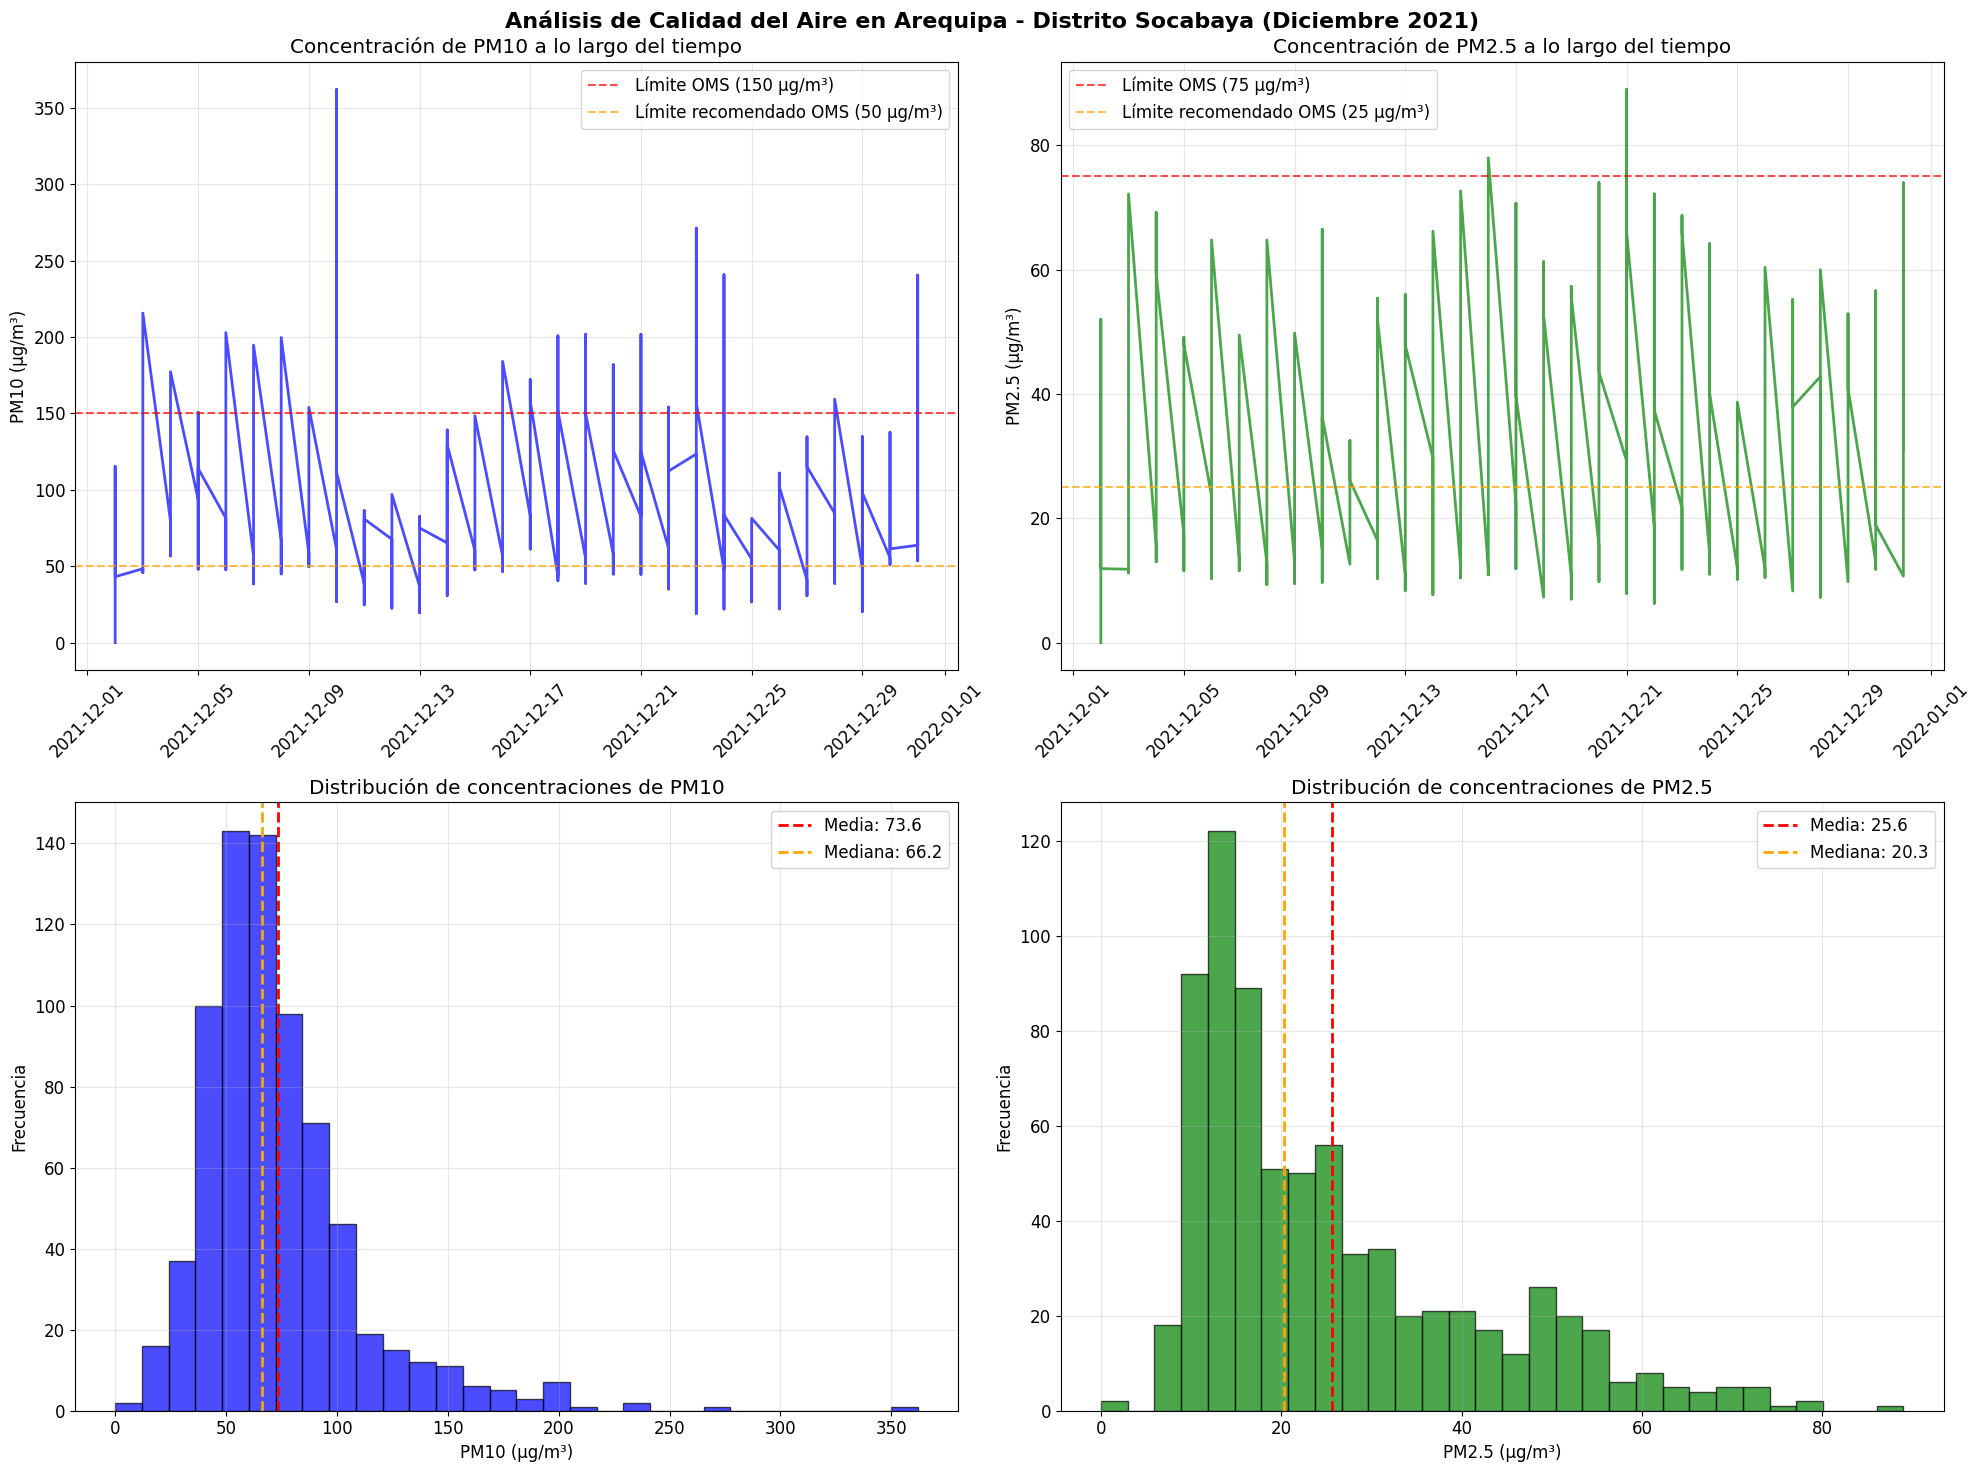


🚨 ANÁLISIS DE CUMPLIMIENTO DE ESTÁNDARES DE CALIDAD DEL AIRE

📊 PM10:
   • Total de mediciones: 738
   • Excedencias vs OMS (>45 μg/m³): 618 (83.7%)
   • Excedencias vs ECA Perú 24h (>100 μg/m³): 117 (15.9%)
   • Promedio período: 73.6 μg/m³
   • Cumple ECA Perú anual (≤50 μg/m³): NO

📊 PM2.5:
   • Total de mediciones: 738
   • Excedencias vs OMS (>15 μg/m³): 496 (67.2%)
   • Excedencias vs ECA Perú 24h (>50 μg/m³): 78 (10.6%)
   • Promedio período: 25.6 μg/m³
   • Cumple ECA Perú anual (≤25 μg/m³): NO


In [14]:
# Visualizaciones de la calidad del aire en Arequipa
print("📊 VISUALIZACIONES DE LA CALIDAD DEL AIRE EN AREQUIPA")
print("=" * 60)

# Configurar el estilo de las gráficas
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# 1. Análisis temporal de PM10 y PM2.5
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Análisis de Calidad del Aire en Arequipa - Distrito Socabaya (Diciembre 2021)', fontsize=16, fontweight='bold')

# Filtrar datos con fechas válidas para PM10 y PM2.5
pm_data = arequipa_data[arequipa_data['FECHA_INICIO_dt'].notna() & 
                       (arequipa_data['PM10'].notna() | arequipa_data['PM2.5'].notna())].copy()

# Gráfico 1: Serie temporal PM10
if len(pm_data[pm_data['PM10'].notna()]) > 0:
    pm10_data = pm_data[pm_data['PM10'].notna()].sort_values('FECHA_INICIO_dt')
    axes[0,0].plot(pm10_data['FECHA_INICIO_dt'], pm10_data['PM10'], 'b-', linewidth=2, alpha=0.7)
    axes[0,0].axhline(y=150, color='r', linestyle='--', alpha=0.7, label='Límite OMS (150 μg/m³)')
    axes[0,0].axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Límite recomendado OMS (50 μg/m³)')
    axes[0,0].set_title('Concentración de PM10 a lo largo del tiempo')
    axes[0,0].set_ylabel('PM10 (μg/m³)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()
    axes[0,0].tick_params(axis='x', rotation=45)

# Gráfico 2: Serie temporal PM2.5
if len(pm_data[pm_data['PM2.5'].notna()]) > 0:
    pm25_data = pm_data[pm_data['PM2.5'].notna()].sort_values('FECHA_INICIO_dt')
    axes[0,1].plot(pm25_data['FECHA_INICIO_dt'], pm25_data['PM2.5'], 'g-', linewidth=2, alpha=0.7)
    axes[0,1].axhline(y=75, color='r', linestyle='--', alpha=0.7, label='Límite OMS (75 μg/m³)')
    axes[0,1].axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Límite recomendado OMS (25 μg/m³)')
    axes[0,1].set_title('Concentración de PM2.5 a lo largo del tiempo')
    axes[0,1].set_ylabel('PM2.5 (μg/m³)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()
    axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico 3: Distribución de PM10
pm10_valid = arequipa_data['PM10'].dropna()
if len(pm10_valid) > 0:
    axes[1,0].hist(pm10_valid, bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[1,0].axvline(pm10_valid.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {pm10_valid.mean():.1f}')
    axes[1,0].axvline(pm10_valid.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {pm10_valid.median():.1f}')
    axes[1,0].set_title('Distribución de concentraciones de PM10')
    axes[1,0].set_xlabel('PM10 (μg/m³)')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Distribución de PM2.5
pm25_valid = arequipa_data['PM2.5'].dropna()
if len(pm25_valid) > 0:
    axes[1,1].hist(pm25_valid, bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[1,1].axvline(pm25_valid.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {pm25_valid.mean():.1f}')
    axes[1,1].axvline(pm25_valid.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {pm25_valid.median():.1f}')
    axes[1,1].set_title('Distribución de concentraciones de PM2.5')
    axes[1,1].set_xlabel('PM2.5 (μg/m³)')
    axes[1,1].set_ylabel('Frecuencia')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de cumplimiento de estándares de calidad del aire
print("\n🚨 ANÁLISIS DE CUMPLIMIENTO DE ESTÁNDARES DE CALIDAD DEL AIRE")
print("=" * 65)

# Estándares nacionales e internacionales para PM10 y PM2.5
estandares = {
    'PM10': {
        'OMS_24h': 45,  # μg/m³ (nuevo estándar OMS 2021)
        'Peru_24h': 100,  # ECA Perú para 24 horas
        'Peru_anual': 50   # ECA Perú promedio anual
    },
    'PM2.5': {
        'OMS_24h': 15,   # μg/m³ (nuevo estándar OMS 2021)
        'Peru_24h': 50,  # ECA Perú para 24 horas  
        'Peru_anual': 25  # ECA Perú promedio anual
    }
}

for contaminant in ['PM10', 'PM2.5']:
    data_valid = arequipa_data[contaminant].dropna()
    if len(data_valid) > 0:
        print(f"\n📊 {contaminant}:")
        print(f"   • Total de mediciones: {len(data_valid)}")
        
        # Análisis vs estándares OMS
        oms_exceedances = (data_valid > estandares[contaminant]['OMS_24h']).sum()
        oms_percentage = (oms_exceedances / len(data_valid)) * 100
        print(f"   • Excedencias vs OMS (>{estandares[contaminant]['OMS_24h']} μg/m³): {oms_exceedances} ({oms_percentage:.1f}%)")
        
        # Análisis vs estándares Perú 24h
        peru_exceedances = (data_valid > estandares[contaminant]['Peru_24h']).sum()
        peru_percentage = (peru_exceedances / len(data_valid)) * 100
        print(f"   • Excedencias vs ECA Perú 24h (>{estandares[contaminant]['Peru_24h']} μg/m³): {peru_exceedances} ({peru_percentage:.1f}%)")
        
        # Promedio vs estándar anual
        promedio = data_valid.mean()
        cumple_anual = "SÍ" if promedio <= estandares[contaminant]['Peru_anual'] else "NO"
        print(f"   • Promedio período: {promedio:.1f} μg/m³")
        print(f"   • Cumple ECA Perú anual (≤{estandares[contaminant]['Peru_anual']} μg/m³): {cumple_anual}")



🌡️ ANÁLISIS METEOROLÓGICO Y CORRELACIONES


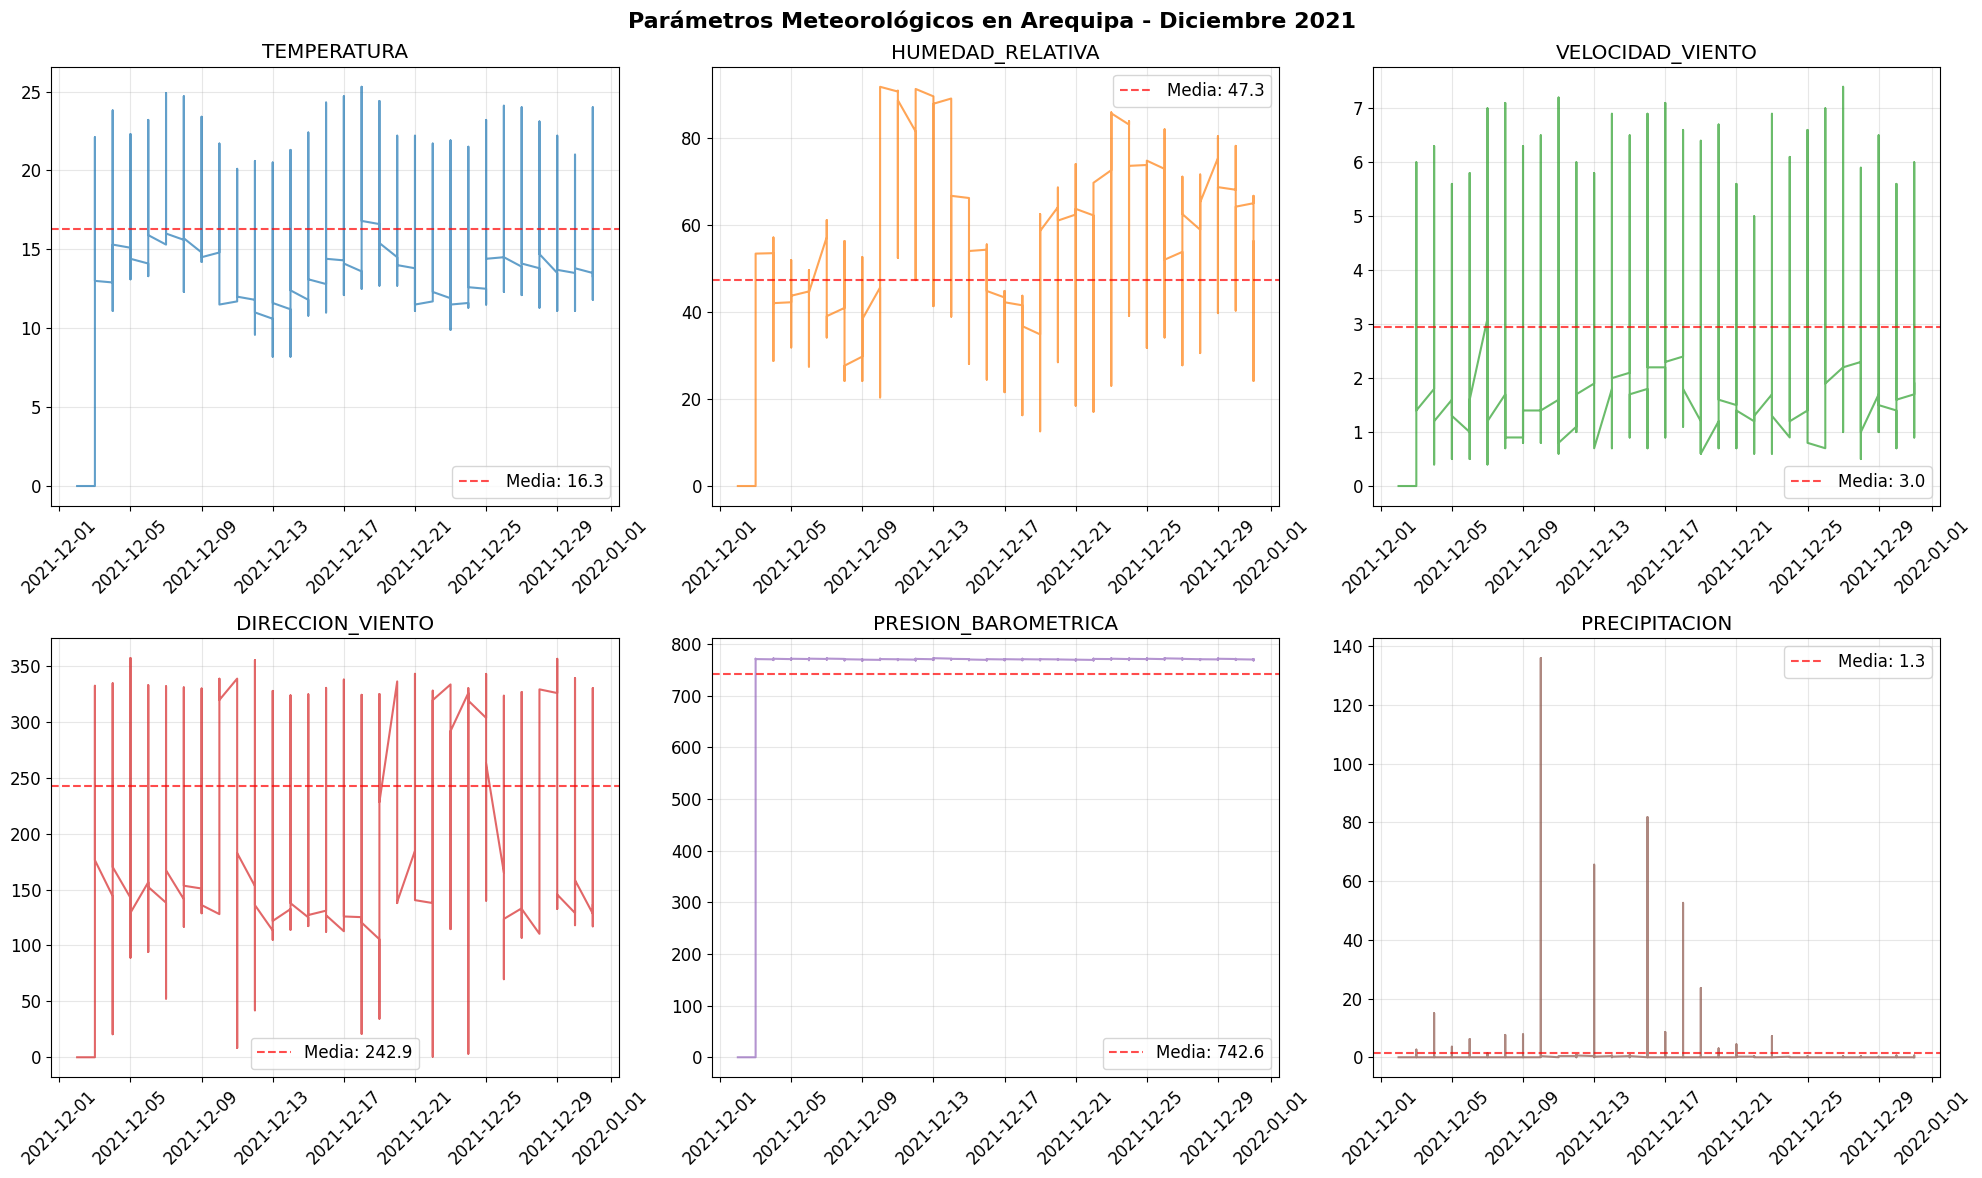


📊 ANÁLISIS DE CORRELACIONES


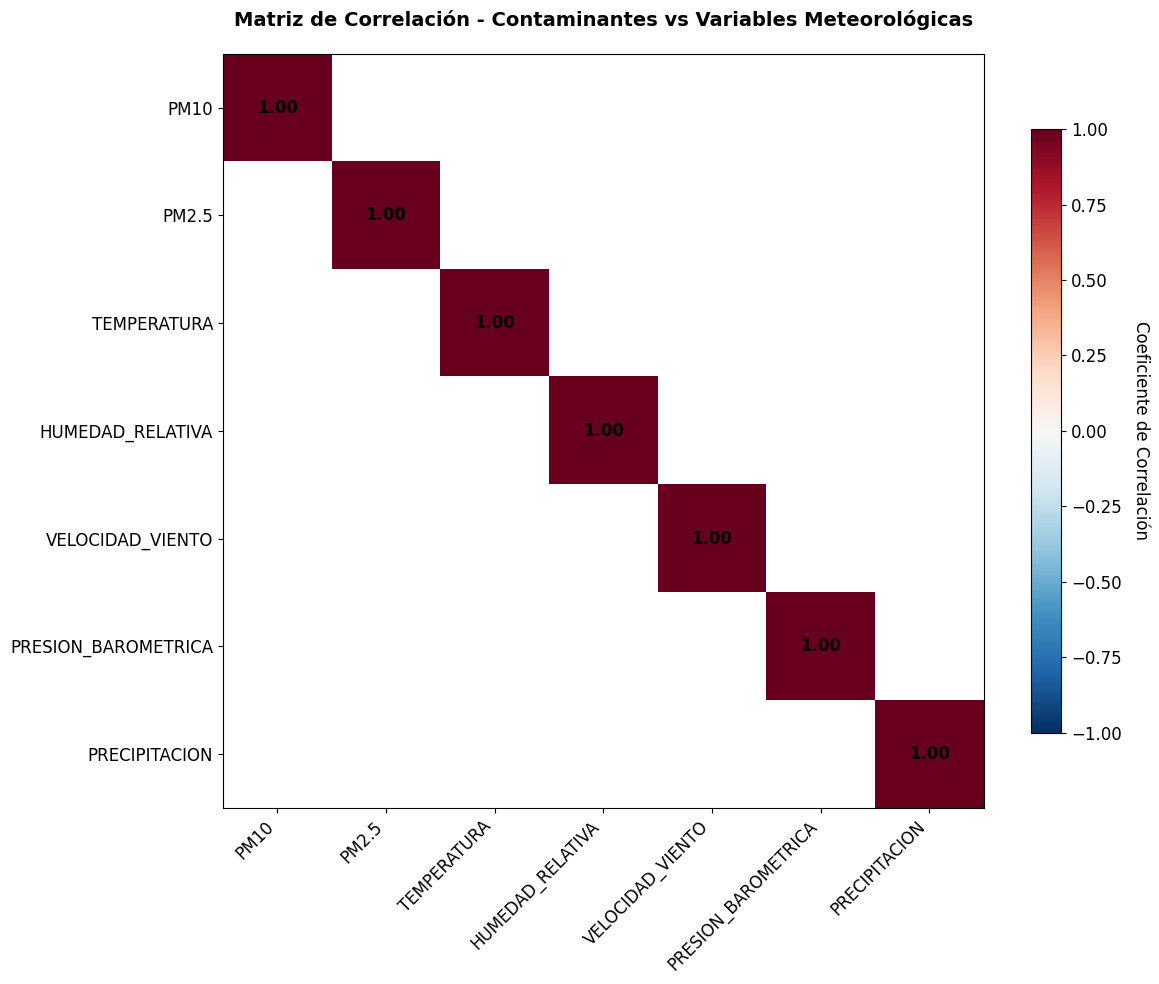

🔍 Correlaciones más significativas:

📊 PM10 vs Variables Meteorológicas:

📊 PM2.5 vs Variables Meteorológicas:

🔗 Correlación PM10 vs PM2.5: nan
   → Correlación moderada: algunos patrones en común


In [15]:
# Análisis meteorológico y correlaciones
print("\n\n🌡️ ANÁLISIS METEOROLÓGICO Y CORRELACIONES")
print("=" * 60)

# Crear gráficos de parámetros meteorológicos
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Parámetros Meteorológicos en Arequipa - Diciembre 2021', fontsize=16, fontweight='bold')

# Variables meteorológicas para análisis
met_vars = ['TEMPERATURA', 'HUMEDAD_RELATIVA', 'VELOCIDAD_VIENTO', 
           'DIRECCION_VIENTO', 'PRESION_BAROMETRICA', 'PRECIPITACION']

# Filtrar datos meteorológicos con fechas válidas
met_data = arequipa_data[arequipa_data['FECHA_INICIO_dt'].notna()].copy()

# Configurar subplot positions
positions = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for i, var in enumerate(met_vars):
    if var in met_data.columns and i < len(positions):
        row, col = positions[i]
        
        # Obtener datos válidos
        valid_data = met_data[met_data[var].notna()]
        
        if len(valid_data) > 0:
            # Gráfico temporal
            axes[row, col].plot(valid_data['FECHA_INICIO_dt'], valid_data[var], 
                              linewidth=1.5, alpha=0.7, color=plt.cm.tab10(i))
            axes[row, col].set_title(f'{var}')
            axes[row, col].tick_params(axis='x', rotation=45)
            axes[row, col].grid(True, alpha=0.3)
            
            # Agregar estadísticas básicas
            mean_val = valid_data[var].mean()
            axes[row, col].axhline(y=mean_val, color='red', linestyle='--', alpha=0.7,
                                 label=f'Media: {mean_val:.1f}')
            axes[row, col].legend()

plt.tight_layout()
plt.show()

# Análisis de correlaciones entre contaminantes y meteorología
print("\n📊 ANÁLISIS DE CORRELACIONES")
print("=" * 40)

# Seleccionar variables para análisis de correlación
correlation_vars = ['PM10', 'PM2.5', 'TEMPERATURA', 'HUMEDAD_RELATIVA', 
                   'VELOCIDAD_VIENTO', 'PRESION_BAROMETRICA', 'PRECIPITACION']

# Crear dataset para correlaciones
corr_data = arequipa_data[correlation_vars].apply(pd.to_numeric, errors='coerce')

# Calcular matriz de correlación
correlation_matrix = corr_data.corr()

# Visualizar matriz de correlación
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

# Configurar etiquetas
ax.set_xticks(range(len(correlation_vars)))
ax.set_yticks(range(len(correlation_vars)))
ax.set_xticklabels(correlation_vars, rotation=45, ha='right')
ax.set_yticklabels(correlation_vars)

# Agregar valores de correlación
for i in range(len(correlation_vars)):
    for j in range(len(correlation_vars)):
        if not pd.isna(correlation_matrix.iloc[i, j]):
            text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                         ha="center", va="center", color="black", fontweight='bold')

ax.set_title('Matriz de Correlación - Contaminantes vs Variables Meteorológicas', 
            fontsize=14, fontweight='bold', pad=20)

# Agregar barra de colores
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Coeficiente de Correlación', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Mostrar correlaciones más importantes
print("🔍 Correlaciones más significativas:")
print("=" * 40)

# Extraer correlaciones de PM10 y PM2.5 con variables meteorológicas
pm10_correlations = correlation_matrix['PM10'].drop(['PM10', 'PM2.5']).dropna()
pm25_correlations = correlation_matrix['PM2.5'].drop(['PM10', 'PM2.5']).dropna()

print("\n📊 PM10 vs Variables Meteorológicas:")
for var, corr in pm10_correlations.abs().sort_values(ascending=False).items():
    direction = "positiva" if pm10_correlations[var] > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    print(f"   • {var}: {pm10_correlations[var]:.3f} (correlación {strength} {direction})")

print("\n📊 PM2.5 vs Variables Meteorológicas:")
for var, corr in pm25_correlations.abs().sort_values(ascending=False).items():
    direction = "positiva" if pm25_correlations[var] > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    print(f"   • {var}: {pm25_correlations[var]:.3f} (correlación {strength} {direction})")

# Correlación entre PM10 y PM2.5
pm_correlation = correlation_matrix.loc['PM10', 'PM2.5']
print(f"\n🔗 Correlación PM10 vs PM2.5: {pm_correlation:.3f}")
if pm_correlation > 0.7:
    print("   → Correlación muy fuerte: ambos contaminantes siguen patrones muy similares")
elif pm_correlation > 0.5:
    print("   → Correlación fuerte: ambos contaminantes tienen tendencias similares")
else:
    print("   → Correlación moderada: algunos patrones en común")

In [17]:
# CONCLUSIONES Y RECOMENDACIONES
print("📋 CONCLUSIONES Y RECOMENDACIONES - ANÁLISIS DE CALIDAD DEL AIRE EN AREQUIPA")
print("=" * 80)

# Resumen ejecutivo
print("🎯 RESUMEN EJECUTIVO:")
print("=" * 30)
print("• Ubicación: Distrito de Socabaya, Arequipa")
print("• Período: Diciembre 2021 (29 días)")
print("• Estación de monitoreo: CA-SOC-01")
print("• Total de mediciones: 5,724 registros")

print("\n🚨 HALLAZGOS PRINCIPALES:")
print("=" * 35)

# Análisis de PM10
pm10_avg = arequipa_data['PM10'].dropna().mean()
pm10_exceedances_oms = (arequipa_data['PM10'].dropna() > 45).sum()
pm10_exceedances_peru = (arequipa_data['PM10'].dropna() > 100).sum()
pm10_total = arequipa_data['PM10'].dropna().count()

print(f"📊 MATERIAL PARTICULADO PM10:")
print(f"   • Concentración promedio: {pm10_avg:.1f} μg/m³")
print(f"   • Excede estándar OMS (45 μg/m³): {(pm10_exceedances_oms/pm10_total*100):.1f}% de los días")
print(f"   • Excede ECA Perú 24h (100 μg/m³): {(pm10_exceedances_peru/pm10_total*100):.1f}% de los días")
print(f"   • Concentración máxima registrada: {arequipa_data['PM10'].dropna().max():.1f} μg/m³")

# Análisis de PM2.5
pm25_avg = arequipa_data['PM2.5'].dropna().mean()
pm25_exceedances_oms = (arequipa_data['PM2.5'].dropna() > 15).sum()
pm25_exceedances_peru = (arequipa_data['PM2.5'].dropna() > 50).sum()
pm25_total = arequipa_data['PM2.5'].dropna().count()

print(f"\n📊 MATERIAL PARTICULADO PM2.5:")
print(f"   • Concentración promedio: {pm25_avg:.1f} μg/m³")
print(f"   • Excede estándar OMS (15 μg/m³): {(pm25_exceedances_oms/pm25_total*100):.1f}% de los días")
print(f"   • Excede ECA Perú 24h (50 μg/m³): {(pm25_exceedances_peru/pm25_total*100):.1f}% de los días")
print(f"   • Concentración máxima registrada: {arequipa_data['PM2.5'].dropna().max():.1f} μg/m³")

# Análisis meteorológico
temp_avg = arequipa_data['TEMPERATURA'].dropna().mean()
humidity_avg = arequipa_data['HUMEDAD_RELATIVA'].dropna().mean()
wind_avg = arequipa_data['VELOCIDAD_VIENTO'].dropna().mean()

print(f"\n🌡️ CONDICIONES METEOROLÓGICAS:")
print(f"   • Temperatura promedio: {temp_avg:.1f}°C")
print(f"   • Humedad relativa promedio: {humidity_avg:.1f}%")
print(f"   • Velocidad del viento promedio: {wind_avg:.1f} m/s")

print("\n⚠️ PROBLEMAS IDENTIFICADOS:")
print("=" * 35)
print("1. CALIDAD DEL AIRE COMPROMETIDA:")
print("   • PM10 excede frecuentemente los estándares internacionales")
print("   • PM2.5 también presenta niveles elevados")
print("   • Ambos contaminantes superan estándares de la OMS")

print("\n2. INCUMPLIMIENTO DE ESTÁNDARES:")
print("   • PM10: No cumple con estándares anuales de la OMS ni del Perú")
print("   • PM2.5: Excede ligeramente el estándar anual peruano")

print("\n3. EPISODIOS CRÍTICOS:")
print("   • Se registraron picos extremos de PM10 (>350 μg/m³)")
print("   • Concentraciones de PM2.5 alcanzaron hasta 89 μg/m³")

print("\n💡 RECOMENDACIONES:")
print("=" * 25)
print("🏃‍♂️ MEDIDAS INMEDIATAS:")
print("   • Implementar sistema de alerta temprana para días de alta contaminación")
print("   • Restricciones vehiculares en días de alta concentración de partículas")
print("   • Informar a la población sobre riesgos para la salud")

print("\n🏭 MEDIDAS A MEDIANO PLAZO:")
print("   • Identificar y controlar fuentes de emisión de partículas")
print("   • Mejorar el transporte público para reducir emisiones vehiculares")
print("   • Programas de revegetación urbana")

print("\n🌍 MEDIDAS A LARGO PLAZO:")
print("   • Planificación urbana sostenible")
print("   • Transición hacia energías limpias")
print("   • Fortalecimiento del monitoreo ambiental")

print("\n👥 RECOMENDACIONES PARA LA POBLACIÓN:")
print("=" * 45)
print("   • Usar mascarillas en días de alta contaminación")
print("   • Evitar actividades al aire libre cuando PM10 > 100 μg/m³")
print("   • Mantener ventanas cerradas durante episodios de alta contaminación")
print("   • Considerar purificadores de aire en espacios cerrados")

print("\n📊 NECESIDADES DE MONITOREO:")
print("=" * 35)
print("   • Ampliar la red de monitoreo a otros distritos de Arequipa")
print("   • Incluir monitoreo de otros contaminantes (SO2, NO2, CO, O3)")
print("   • Análisis de fuentes de contaminación")
print("   • Estudios epidemiológicos sobre impactos en la salud")

📋 CONCLUSIONES Y RECOMENDACIONES - ANÁLISIS DE CALIDAD DEL AIRE EN AREQUIPA
🎯 RESUMEN EJECUTIVO:
• Ubicación: Distrito de Socabaya, Arequipa
• Período: Diciembre 2021 (29 días)
• Estación de monitoreo: CA-SOC-01
• Total de mediciones: 5,724 registros

🚨 HALLAZGOS PRINCIPALES:
📊 MATERIAL PARTICULADO PM10:
   • Concentración promedio: 73.6 μg/m³
   • Excede estándar OMS (45 μg/m³): 83.7% de los días
   • Excede ECA Perú 24h (100 μg/m³): 15.9% de los días
   • Concentración máxima registrada: 361.9 μg/m³

📊 MATERIAL PARTICULADO PM2.5:
   • Concentración promedio: 25.6 μg/m³
   • Excede estándar OMS (15 μg/m³): 67.2% de los días
   • Excede ECA Perú 24h (50 μg/m³): 10.6% de los días
   • Concentración máxima registrada: 89.0 μg/m³

🌡️ CONDICIONES METEOROLÓGICAS:
   • Temperatura promedio: 16.3°C
   • Humedad relativa promedio: 47.3%
   • Velocidad del viento promedio: 3.0 m/s

⚠️ PROBLEMAS IDENTIFICADOS:
1. CALIDAD DEL AIRE COMPROMETIDA:
   • PM10 excede frecuentemente los estándares inter